<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Ответим-на-вопросы" data-toc-modified-id="Ответим-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответим на вопросы</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов.

Цель исследования пронализировать входные данные от банка и определить как определенные характеристики клиентов влияют на степень их надёжности. А именно ответить на вопросы:
* `"Есть ли зависимость между наличием детей и возвратом кредита в срок?";`
* `"Есть ли зависимость между семейным положением и возвратом кредита в срок?";`
* `"Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";`
* `"Как разные цели кредита влияют на его возврат в срок?";`

А также распределить заемщиков на группы по надежности. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Общая информация

In [1]:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter
import seaborn
df = pd.read_csv('/datasets/data.csv')
pd.set_option('display.float_format', '{:,.2f}'.format)
df.head(10)# получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,"-8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,"253,875.64",покупка жилья
1,1,"-4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,"112,080.01",приобретение автомобиля
2,0,"-5,623.42",33,Среднее,1,женат / замужем,0,M,сотрудник,0,"145,885.95",покупка жилья
3,3,"-4,124.75",32,среднее,1,женат / замужем,0,M,сотрудник,0,"267,628.55",дополнительное образование
4,0,"340,266.07",53,среднее,1,гражданский брак,1,F,пенсионер,0,"158,616.08",сыграть свадьбу
5,0,-926.19,27,высшее,0,гражданский брак,1,M,компаньон,0,"255,763.57",покупка жилья
6,0,"-2,879.20",43,высшее,0,женат / замужем,0,F,компаньон,0,"240,525.97",операции с жильем
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,"135,823.93",образование
8,2,"-6,929.87",35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,"95,856.83",на проведение свадьбы
9,0,"-2,188.76",41,среднее,1,женат / замужем,0,M,сотрудник,0,"144,425.94",покупка жилья для семьи


In [2]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 21471 строк и 12 столбцов: 
Типы данных в столбцах таблицы: строки - 5, целые числа - 5, вещественные числа - 2. В данных есть пропущенные значения.

In [3]:
df.isna().sum()# подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбцах `days_employed` (общий трудовой стаж в днях) и `total_income`(ежемесячный доход) отсутствуют по 2174 значений соотвественно.

**Вывод**

Для ответов на поставленные вопросы:
* `1."Есть ли зависимость между наличием детей и возвратом кредита в срок?";`
* `2."Есть ли зависимость между семейным положением и возвратом кредита в срок?";`
* `3."Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";`
* `4."Как разные цели кредита влияют на его возврат в срок?";`

понадобяться данные из колонок `children`, `family_status`, `family_status_id`, `total_income`, `purpose` и `debt`. 

В колонке `total_income`(ежемесячный доход) отсутсвуют 2120 значений, что является около 10% от всех полученных данных. Игнорирование такого объема данных снизить точность исследования в третьем вопросе(`"Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"`). Кроме того значения в данной колонке(ежемесячный доход) занчения указаны в долях копейки и имеют  тип данных float64, следует их округлить до рубля, привести к целочисленному типу данных int64. Также следует леммитизировать и категоризировать данные в  колонках `purpose` и `total_income` для упрощения и повышения точности анализа, при ответе на 3 и 4 вопросы.

##  Предобработка данных

### Обработка пропусков

In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,"21,525.00","19,351.00","21,525.00","21,525.00","21,525.00","21,525.00","19,351.00"
mean,0.54,"63,046.50",43.29,0.82,0.97,0.08,"167,422.30"
std,1.38,"140,827.31",12.57,0.55,1.42,0.27,"102,971.57"
min,-1.00,"-18,388.95",0.00,0.00,0.00,0.00,"20,667.26"
25%,0.00,"-2,747.42",33.00,1.00,0.00,0.00,"103,053.15"
50%,0.00,"-1,203.37",42.00,1.00,0.00,0.00,"145,017.94"
75%,1.00,-291.10,53.00,1.00,1.00,0.00,"203,435.07"
max,20.00,"401,755.40",75.00,4.00,4.00,1.00,"2,265,604.03"


В столбце days_employed есть отрицательные значения и аномально большие значения

In [5]:
df['days_employed'] = df['days_employed'].abs()# модуль по столбцу

In [6]:
df['days_employed'].describe()

count    19,351.00
mean     66,914.73
std     139,030.88
min          24.14
25%         927.01
50%       2,194.22
75%       5,537.88
max     401,755.40
Name: days_employed, dtype: float64

Найдем возможный максимальный стаж работы самого возрастного клиента, при условии, что он работал с 16 лет

In [7]:
max_days_of_employment = (df['dob_years'].max() - 16) * 365
max_days_of_employment

21535

In [8]:
df[df['days_employed'] > 21535]['days_employed'].count()

3445

3445 значений работавших более 60 лет. Это значения не в днях, а в часах. Переведем в дни.

In [9]:
def days(days):     
    if days > 21535:
        return days / 24
    return days    
df['days_employed'] = df['days_employed'].apply(days)

In [10]:
days_income_pivot = df.pivot_table(index='income_type', values='days_employed', aggfunc='mean')
days_income_pivot

,days_employed
income_type,
безработный,"15,267.24"
в декрете,"3,296.76"
госслужащий,"3,399.90"
компаньон,"2,111.52"
пенсионер,"15,208.48"
предприниматель,520.85
сотрудник,"2,326.50"
студент,578.75


In [11]:
df.loc[df.loc[:,'income_type'] == 'безработный']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,"14,063.52",31,среднее,1,женат / замужем,0,M,безработный,1,"59,956.99",покупка жилья для сдачи
14798,0,"16,470.95",45,Высшее,0,гражданский брак,1,F,безработный,0,"202,722.51",ремонт жилью


Многие работают дольше чем живут. Проверим сколько таких.

In [12]:
df[(df['dob_years']*365 - df['days_employed']) < 0][['days_employed']].count()

days_employed    145
dtype: int64

Менее одного процента. Не дожно повлять на данные, к тому же столбец не используется. Значения стажа безработных заменим на нули. Пропуски заменим медианой в соответствии с типом занятости.

In [13]:
df.loc[3133, 'days_employed'] = 0
df.loc[14798, 'days_employed'] = 0

In [14]:
med_days=df.groupby('income_type')['days_employed'].median()
med_days

income_type
безработный            0.00
в декрете          3,296.76
госслужащий        2,689.37
компаньон          1,547.38
пенсионер         15,217.22
предприниматель      520.85
сотрудник          1,574.20
студент              578.75
Name: days_employed, dtype: float64

In [15]:
for income_type in med_days.index:
    df.loc[(df['days_employed'].isna()) & (df['income_type'] == income_type), 'days_employed'] = med_days.loc[income_type]

Также заменими пропуски в столбце дохода, медианой в соответствии с типом занятости.

In [16]:
med_income=df.groupby('income_type')['total_income'].median()
med_income

income_type
безработный       131,339.75
в декрете          53,829.13
госслужащий       150,447.94
компаньон         172,357.95
пенсионер         118,514.49
предприниматель   499,163.14
сотрудник         142,594.40
студент            98,201.63
Name: total_income, dtype: float64

In [17]:
for income_type in med_income.index:
    df.loc[(df['total_income'].isna()) & (df['income_type'] == income_type), 'total_income'] = med_income.loc[income_type]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Обнаружили и скорректировали отрицательные и аномальные значения в столбце days_employed. Заполнили пропуски медианными значениями по типу занятости. Пропущенные данные скорее всего появились вследствие ошибки выгрузки, или какой-либо другой технической ошибки.

### Замена типа данных

In [19]:
df['total_income'] = df['total_income'].astype('int')#замена типа данных на целочисленный
df['days_employed'] = df['days_employed'].astype('int')#замена типа данных на целочисленный

In [20]:
df.info() #проверка, тип данных заменен

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**
Тип данных был заменен на целочисленный универсальным методом astype(), т.к. все значения NaN заменены, можно использовать этот метод. 

### Обработка дубликатов

In [21]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце образование разный регистр

In [22]:
df['education'] = df['education'].str.lower()# приведем к нижнему регистру

In [23]:
df.duplicated().sum() # подсчёт явных дубликатов

71

In [24]:
df = df.drop_duplicates().reset_index(drop=True)# удаление явных дубликатов (с удалением старых индексов и формированием новых)

In [25]:
df.duplicated().sum()#проверка

0

In [26]:
sorted(df['family_status'].unique()) # Просмотр уникальных значений в столбце 'семейное положение'

['Не женат / не замужем',
 'в разводе',
 'вдовец / вдова',
 'гражданский брак',
 'женат / замужем']

Значения в столбце 'семейное положение' категоризированы с юридической точки зрения

In [27]:
sorted(df['children'].unique()) # Просмотр уникальных значений в столбце 'количество детей в семье'

[-1, 0, 1, 2, 3, 4, 5, 20]

В данном ряду выделяются два значения: отрицательное количество детей - (-1) и большое значение - (20). 

In [28]:
print(df['children'].value_counts()) #Подсчет уникальных значений

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Появление отрицательного значения детей однозначно является технической ошибкой, ошибкой ввода данных и т.п. Заменим значение на положительное. В РФ существует одна семья с двадцатью детьми, внесенная в Реестр рекордов России как самая многодетная, также есть несколько семей растящие большое количество приемных детей. В общем это тоже ошибка в данных, исходное значение 2 или 0. Будем считать что 2.

In [29]:
df['children'] = df['children'].replace(20, 2)# Замена некорректных значений

In [30]:
df['children'] = df['children'].replace(-1, 1)# Замена некорректных значений

In [31]:
print(df['children'].value_counts()) #проверка

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64


In [32]:
sorted(df['family_status_id'].unique())# Просмотр уникальных значений в столбце 'идентификатор семейного положения'

[0, 1, 2, 3, 4]

In [33]:
sorted(df['purpose'].unique())# Просмотр уникальных значений в столбце 'цель получения кредита'

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

**Вывод**
В даном разделе были выявлены и удалены явные дубликаты, а также некорректные значения, вызванные техническими ошибками. В столбце 'purpose' присутствует много уникальных значений, имеющих одну и ту же категорию цели получения кредита. Следует провести лемматизацию в значениях столбца и сгруппировать данные в более конкретные категории. 

### Лемматизация

In [34]:
m = Mystem()
text = ' '.join(sorted(df['purpose'].unique()))
lemmas = m.lemmatize(text)
print(lemmas) #Вывод лемм столбца 'цель получения кредита'

['автомобиль', ' ', 'автомобиль', ' ', 'высокий', ' ', 'образование', ' ', 'дополнительный', ' ', 'образование', ' ', 'жилье', ' ', 'заниматься', ' ', 'высокий', ' ', 'образование', ' ', 'заниматься', ' ', 'образование', ' ', 'на', ' ', 'покупка', ' ', 'автомобиль', ' ', 'на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', ' ', 'на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', ' ', 'на', ' ', 'проведение', ' ', 'свадьба', ' ', 'недвижимость', ' ', 'образование', ' ', 'операция', ' ', 'с', ' ', 'жилье', ' ', 'операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'операция', ' ', 'с', ' ', 'недвижимость', ' ', 'операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', ' ', 'покупка', ' ', 'жилой', ' ', 'недвижимость', ' ', 'покупка', ' ', 'жилье', ' ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'сдача', ' ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', ' ', 'покупка', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'покупка', ' ', 'недвижимость', ' ', 'покупка',

In [35]:
from collections import Counter
print(Counter(lemmas)) #подсчёт числа лемм.

Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'на': 4, 'свой': 4, 'операция': 4, 'высокий': 3, 'свадьба': 3, 'получение': 3, 'строительство': 3, 'дополнительный': 2, 'заниматься': 2, 'подержать': 2, 'коммерческий': 2, 'жилой': 2, 'для': 2, 'сделка': 2, 'проведение': 1, 'со': 1, 'сдача': 1, 'семья': 1, 'приобретение': 1, 'профильный': 1, 'ремонт': 1, 'собственный': 1, 'сыграть': 1, '\n': 1})


**Вывод**
Для выделения лемм отбросим все глаголы, прилагательные и предлоги. Выделим основные категории получения кредита. Полученные леммы: недвижимость автомобиль образование свадьба жилье.

### Категоризация данных

Категоризируем столбец 'purpose' используя выделенные ранее леммы:

In [36]:
final_category = ['недвижимость', 'автомобиль', 'образование', 'свадьба', 'жилье']
def purp_cat(purpose): #функция для лемматизации столбца 'purpose'
    lemmas = m.lemmatize(purpose)
    for category in final_category:
        if category in lemmas:
            return category# возвращает категорию из final_category, принятую из значений  столбца 'purpose'
    return Nonе
df['purpose_cat'] = df['purpose'].apply(purp_cat) #Добавляем столбец с категориями к датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int64 
 1   days_employed     21454 non-null  int64 
 2   dob_years         21454 non-null  int64 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int64 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int64 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int64 
 10  total_income      21454 non-null  int64 
 11  purpose           21454 non-null  object
 12  purpose_cat       21454 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.1+ MB


Жилье и недвижимость это одна и таже категория. Объединим их в одну.

In [37]:
df['purpose_cat'] = df['purpose_cat'].replace('жилье', 'недвижимость')#замена 'жилье' на 'недвижимость'

In [38]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость


Категоризируем total_income по уровню дохода. Уровнень дохода обычно определяется как общий доход всех членов семьи, разделенный на количество членов семьи, в том числе несовершеннолетних детей и лиц находящихся на иждевении. Т.к. в данных отстутствуют сведения о количестве несовершеннолетних детей будем считать 'total_income' общим уровнем дохода. Определим три категории дохода низший, средний, высший класс, без деления классов  на подкатегории. Будем ориентироваться на исследование аналитического кредитного рейтингового агентства(АКРА),  «Основные мАКРАтренды: рост региональной дифференциации в России», согласно которому, для принадлежности к среднему классу, в Москве нужно иметь уровень дохода от 121 тыс. рублей, для регионов - минимум  60 тыс. рублей соответсвенно. Высокий доход определим, как доход более чем вдвое превышаеший средний показатель. 

In [39]:
def income_group(income): #функция для категоризации столбца 'total_income' по уровню дохода     
    if income <= 60000:
        return 'низкий доход'
    if income <= 121000:
        return 'средний доход'
    return 'высокий доход' 
df['total_income_cat'] = df['total_income'].apply(income_group)#Добавляем столбец с категориями к датафрейму

In [40]:
df.head(10)#проверка

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_cat,total_income_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,высокий доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,высокий доход
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,высокий доход
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость,высокий доход
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость,высокий доход
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,высокий доход
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,средний доход
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,высокий доход


In [41]:
df['total_income_cat'].value_counts()#Подсчет значений

высокий доход    14121
средний доход     6527
низкий доход       806
Name: total_income_cat, dtype: int64

Категоризирум столбец 'children' — количество детей в семье, по категориям принятым в РФ. Многодетной семьей считается семья с количеством несовершеннолетних детей больше двух. При категоризации данного столбца будем считать всех детей несовершеннолетними.

In [42]:
def children_cat(children):     
    if children >= 2:
        return 'многодетная'
    if children > 0:
        return 'малодетная'
    return 'нет детей' 
df['children_cat'] = df['children'].apply(children_cat)

In [43]:
df.head(10)#проверка

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_cat,total_income_cat,children_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,высокий доход,малодетная
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний доход,малодетная
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,высокий доход,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,высокий доход,многодетная
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,высокий доход,нет детей
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость,высокий доход,нет детей
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость,высокий доход,нет детей
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,высокий доход,нет детей
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,средний доход,многодетная
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,высокий доход,нет детей


In [44]:
df['children_cat'].value_counts()#Подсчет значений

нет детей      14091
малодетная      4855
многодетная     2508
Name: children_cat, dtype: int64

**Вывод**

В данном разделе категоризированы столбцы уровня дохода, количества детей, а также цели кредита. Для более точного анализа, необходимы данные о количестве несовершеннолетних детей и регионе где собиралась информация.

##  Ответим на вопросы

Ось Х - категория

Ось Y - отношение наличия или отсутвия задолженности в %

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [45]:
children_pivot = df.pivot_table(index=['children_cat'], columns='debt', values='children', aggfunc='count')# создаем сводную таблицу
children_pivot['ratio'] = children_pivot[1] / (children_pivot[0]+children_pivot[1])# вычисляем соотношение
children_pivot

debt,0,1,ratio
children_cat,,,
малодетная,4410,445,0.09
многодетная,2275,233,0.09
нет детей,13028,1063,0.08


<AxesSubplot:>

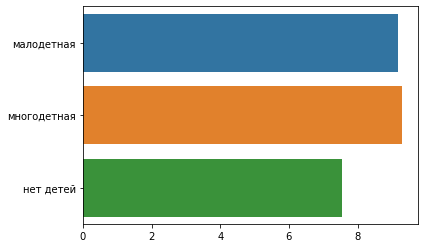

In [46]:
column_ch = ['малодетная', 'многодетная', 'нет детей']
ratio_ch = [9.1658, 9.2903, 7.5438]
seaborn.barplot(x=ratio_ch, y=column_ch)

**Вывод**

Клиенты без детей более надежные заемщики.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [47]:
family_pivot = df.pivot_table(index=['family_status'], columns='debt', values='family_status_id', aggfunc='count')
family_pivot['ratio'] = family_pivot[1] / (family_pivot[0]+family_pivot[1])
family_pivot

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2536,274,0.10
в разводе,1110,85,0.07
вдовец / вдова,896,63,0.07
гражданский брак,3763,388,0.09
женат / замужем,11408,931,0.08


<AxesSubplot:>

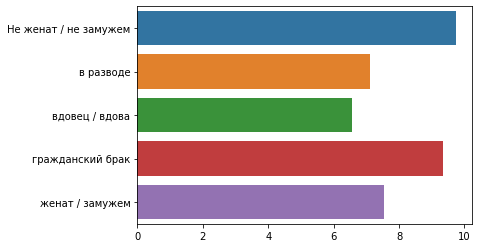

In [48]:
column_fam = ['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем' ]
ratio_fam = [9.7509, 7.1130, 6.5693, 9.3471, 7.5452]
seaborn.barplot(x=ratio_fam, y=column_fam)

Не женатые и проживающие в гражданском браке допускали больше всего просрочек по кредитам. 

**Вывод** 

`Не женатые и проживающие в гражданском браке` допускали больше всего просрочек по кредитам. Наиболее надежный заёмщик по категории 'семейный статус' - `вдовец / вдова`	

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [49]:
income_pivot = df.pivot_table(index=['total_income_cat'], columns='debt', values='total_income', aggfunc='count')
income_pivot['ratio'] = income_pivot[1] / (income_pivot[0]+income_pivot[1])
income_pivot

debt,0,1,ratio
total_income_cat,,,
высокий доход,12978,1143,0.08
низкий доход,757,49,0.06
средний доход,5978,549,0.08


<AxesSubplot:>

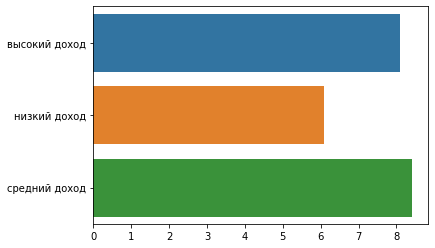

In [50]:
column_inc = ['высокий доход', 'низкий доход', 'средний доход']
ratio_inc = [8.0943, 6.0794, 8.4112]
seaborn.barplot(x=ratio_inc, y=column_inc)

**Вывод**

Наиболее надежный заемщик - заемщик с низким доходом

### Как разные цели кредита влияют на его возврат в срок?

In [51]:
purpose_pivot = df.pivot_table(index=['purpose_cat'], columns='debt', values='purpose', aggfunc='count')
purpose_pivot['ratio'] = purpose_pivot[1] / (purpose_pivot[0]+purpose_pivot[1])
purpose_pivot

debt,0,1,ratio
purpose_cat,,,
автомобиль,3903,403,0.09
недвижимость,10029,782,0.07
образование,3643,370,0.09
свадьба,2138,186,0.08


<AxesSubplot:>

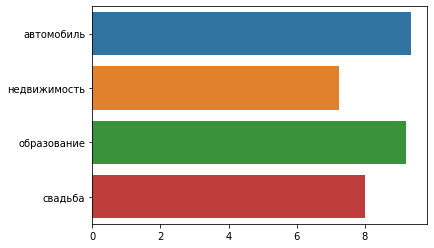

In [52]:
column_pur = ['автомобиль', 'недвижимость', 'образование', 'свадьба']
ratio_pur = [9.3590, 7.2334, 9.2200, 8.0034]
seaborn.barplot(x=ratio_pur, y=column_pur)

**Вывод**

Ипотека и кредит на свадьбу - самый надежный!

## Общий вывод

Ответим на вопросы - цели исследования:
* `"Есть ли зависимость между наличием детей и возвратом кредита в срок?";` - Отсутствие детей положительно влияет на вероятность возврата кредита в срок
* `"Есть ли зависимость между семейным положением и возвратом кредита в срок?";` - Граждане находящиеся и бывшие в официальном браке(разведенные или овдовевшие) более надежные заёмщики, чем лица не находившиеся в официальных отношениях или одинокие(гражданский брак, не женат / не замужем).
* `"Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";`  - Как показали данные, наиболее надежный заемщик это заемщик с невысоким доходом.
* `"Как разные цели кредита влияют на его возврат в срок?";` - Самый низкий процент просрочек, это кредит на недвижимость - ипотека.

Идеальный портрет заемщика по проанализированным зависимостям это: "Бездетный вдовец/вдова с небольшим уровнем дохода, беруший(ая) ипотеку"
